In [1]:
import os
import glob
import re
import matplotlib.pyplot as plt
from matplotlib import animation as ani
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator
from matplotlib.dates import DateFormatter, DayLocator
import pandas as pd
from svgpath2mpl import parse_path
import datetime
import matplotlib as mpl

In [2]:
%matplotlib notebook

In [18]:
df = pd.read_csv("data/TSLA.csv")

In [19]:
df['Date'] = df['Date'].astype('datetime64')

In [ ]:
## Get first and last day of month for all days before 2020
monthly = pd.concat([
    df.groupby(pd.DatetimeIndex(df.Date).to_period('M')).nth(1)[1:],
    df.groupby(pd.DatetimeIndex(df.Date).to_period('M')).nth(-1) ## Gets last day]
]).sort_values('Date')

In [ ]:
df_clean = pd.concat([monthly[monthly['Date'] < '2020-01-01'], df[df['Date'] >= '2020-01-01']])

In [ ]:
df_clean = df_clean.reset_index()

In [5]:
tesla_logo = parse_path("""M 447.32,561.88  C 494.85,556.62 544.89,545.38 590.17,529.75    610.56,522.75 637.58,511.62 638.71,509.88    639.71,508.12 630.83,497.00 620.82,487.38    606.68,473.75 589.30,461.88 568.53,451.50    552.90,443.75 553.40,443.75 551.77,451.50    547.52,471.00 535.01,481.88 510.37,486.88    492.60,490.62 439.06,493.88 439.06,491.25    439.06,490.38 361.88,58.88 352.00,4.12    351.13,-0.62 348.12,-1.38 347.12,2.88    346.75,4.38 326.98,115.00 303.22,248.75    279.45,382.38 259.94,492.00 259.69,492.13    258.81,493.00 205.40,489.75 196.02,488.25    165.87,483.25 151.61,472.63 147.36,452.25    146.48,448.25 145.35,445.00 144.73,445.00    141.85,445.00 116.46,458.50 104.70,466.25    86.69,478.13 60.04,503.75 60.04,509.13    60.04,510.00 65.30,512.88 71.68,515.50    117.21,534.75 163.87,548.13 215.78,556.75    236.67,560.25 267.69,563.75 278.20,563.75    278.20,563.75 285.08,563.75 285.08,563.75    285.08,563.75 317.23,524.50 317.23,524.50    317.23,524.50 349.38,485.25 349.38,485.25    349.38,485.25 359.88,497.88 359.88,497.88    365.64,504.88 380.02,522.50 391.91,537.13    391.91,537.13 413.42,563.63 413.42,563.63    413.42,563.63 422.80,563.50 422.80,563.50    427.93,563.50 438.94,562.75 447.32,561.88 Z  M 397.16,624.12  C 461.08,619.88 523.12,609.25 582.29,592.38    618.94,582.00 665.23,565.75 666.35,562.88    667.10,561.12 650.59,526.25 649.09,526.25    648.46,526.25 640.33,529.38 630.83,533.25    517.87,579.00 387.90,595.62 258.31,581.13    192.89,573.75 128.72,557.75 68.92,533.63    58.92,529.50 50.29,526.25 49.79,526.25    48.03,526.25 30.90,562.63 32.02,563.63    32.65,564.25 43.28,568.38 55.66,572.88    133.47,601.13 213.65,618.13 296.46,623.75    312.97,624.88 382.02,625.13 397.16,624.12 Z""")
tesla_logo.vertices -= tesla_logo.vertices.mean(axis=0)

In [6]:
wsb = parse_path("""M 437.81,124.09   C 437.81,122.84 435.93,118.58 433.55,114.71     433.55,114.71 429.18,107.58 429.18,107.58     429.18,107.58 440.81,107.58 440.81,107.58     447.31,107.58 454.32,107.95 456.45,108.33     456.45,108.33 460.45,109.20 460.45,109.20     460.45,109.20 454.44,112.58 454.44,112.58     451.07,114.58 446.19,118.46 443.69,121.21     438.56,126.96 437.81,127.34 437.81,124.09 Z   M 537.63,135.97   C 532.87,134.84 532.87,134.84 532.87,128.59     532.87,122.46 528.87,112.58 526.37,112.58     525.87,112.58 525.37,112.20 525.37,111.70     525.37,111.08 531.87,110.83 539.88,111.08     553.39,111.45 554.26,111.58 552.51,113.58     549.76,116.71 547.63,121.08 544.88,129.59     544.88,129.59 542.26,137.10 542.26,137.10     542.26,137.10 537.63,135.97 537.63,135.97 Z   M 483.84,137.97   C 479.84,136.97 476.58,135.60 476.58,134.97     476.58,131.84 499.85,122.59 502.10,124.84     503.73,126.34 502.60,129.97 499.10,134.84     494.97,140.60 494.35,140.72 483.84,137.97 Z   M 607.55,154.98   C 606.05,154.11 605.67,152.86 606.18,150.48     606.18,150.48 607.05,147.35 607.05,147.35     607.05,147.35 603.67,149.60 603.67,149.60     600.80,151.36 599.55,151.48 596.29,150.48     594.04,149.73 589.79,148.60 586.66,148.23     583.53,147.73 580.66,147.10 580.16,146.85     579.16,146.23 582.66,135.47 585.04,131.97     585.91,130.59 586.66,128.21 586.66,126.59     586.66,123.59 582.91,117.08 579.28,113.95     577.53,112.58 579.28,112.45 591.04,113.08     598.67,113.45 612.43,113.95 621.69,114.08     647.70,114.33 651.71,114.83 651.71,117.71     651.71,119.71 650.83,120.08 646.45,120.08     639.57,120.21 636.70,122.46 635.82,128.47     635.32,132.47 635.82,134.09 638.45,137.22     640.20,139.35 641.70,141.60 641.70,142.22     641.70,142.85 642.83,144.60 644.33,146.23     645.83,147.73 646.70,149.23 646.58,149.35     646.33,149.60 643.20,150.11 639.70,150.61     633.57,151.36 633.19,151.23 632.69,148.23     632.32,146.48 632.57,145.10 633.32,145.10     633.94,145.10 634.19,143.98 633.82,142.60     633.44,141.22 633.69,140.10 634.44,140.10     635.07,140.10 635.20,139.60 634.82,138.85     633.82,137.22 629.19,137.22 629.19,138.97     629.19,139.60 629.94,139.85 630.82,139.35     631.82,138.60 631.82,138.97 630.69,140.47     629.69,141.60 629.32,143.10 629.82,143.85     630.19,144.48 629.94,145.10 629.07,145.10     628.19,145.10 627.94,146.35 628.19,148.10     628.82,151.48 627.31,152.61 622.19,152.61     619.18,152.61 619.06,152.23 621.06,142.35     621.56,139.35 620.18,138.72 617.43,140.72     616.06,141.85 614.93,144.60 614.43,148.23     613.81,154.48 611.18,156.99 607.55,154.98 Z   M 597.17,146.85   C 597.67,145.60 597.29,145.10 596.42,145.35     594.54,145.98 593.54,148.85 595.17,148.85     595.79,148.85 596.79,147.98 597.17,146.85 Z   M 619.18,136.22   C 619.18,135.60 618.31,135.09 617.31,135.09     616.31,135.09 615.43,135.97 615.43,136.97     615.43,138.10 616.18,138.47 617.31,138.10     618.31,137.60 619.18,136.85 619.18,136.22 Z   M 631.69,131.34   C 631.69,130.72 630.32,130.09 628.57,130.09     626.81,130.09 625.44,130.72 625.44,131.34     625.44,132.09 626.81,132.59 628.57,132.59     630.32,132.59 631.69,132.09 631.69,131.34 Z   M 619.18,130.09   C 619.18,129.47 617.43,128.84 615.31,128.84     613.18,128.84 611.80,129.34 612.30,130.09     612.68,130.84 614.43,131.34 616.18,131.34     617.81,131.34 619.18,130.84 619.18,130.09 Z   M 604.17,128.84   C 604.17,128.21 603.30,127.59 602.17,127.59     601.17,127.59 600.67,128.21 601.05,128.84     601.42,129.59 602.30,130.09 603.05,130.09     603.67,130.09 604.17,129.59 604.17,128.84 Z   M 619.18,118.83   C 619.18,118.21 618.68,117.58 617.93,117.58     617.31,117.58 616.68,118.21 616.68,118.83     616.68,119.58 617.31,120.08 617.93,120.08     618.68,120.08 619.18,119.58 619.18,118.83 Z   M 606.68,116.83   C 606.68,116.58 605.80,116.33 604.80,116.33     603.80,116.33 602.92,116.83 602.92,117.58     602.92,118.21 603.80,118.46 604.80,118.08     605.80,117.58 606.68,117.08 606.68,116.83 Z   M 535.50,171.87   C 535.38,170.99 533.50,167.49 531.12,163.99     528.75,160.49 526.87,157.61 526.99,157.61     527.12,157.61 529.50,158.49 532.25,159.36     537.75,161.36 538.63,162.86 536.75,169.12     536.13,171.37 535.50,172.62 535.50,171.87 Z   M 398.40,143.60   C 397.03,142.85 392.02,139.72 387.40,136.60     379.77,131.47 378.89,130.59 379.64,127.71     380.64,123.59 388.52,113.95 392.28,112.33     396.65,110.33 401.03,113.95 405.41,122.96     409.66,131.97 410.54,142.98 407.04,144.35     404.16,145.48 401.28,145.23 398.40,143.60 Z   M 388.40,121.34   C 388.02,120.71 386.90,120.08 386.15,120.08     385.27,120.08 385.40,120.58 386.52,121.34     388.90,122.84 389.40,122.84 388.40,121.34 Z   M 490.59,166.37   C 484.09,165.37 470.33,159.49 470.33,157.74     470.33,155.86 484.84,158.99 492.60,162.61     499.98,166.12 502.23,167.74 498.85,167.49     497.97,167.37 494.22,166.87 490.59,166.37 Z   M 549.39,208.27   C 549.39,208.27 540.38,204.02 540.38,204.02     540.38,204.02 540.38,191.01 540.38,191.01     540.38,183.88 541.00,176.37 541.63,174.37     542.38,172.37 543.01,167.62 543.26,163.86     543.26,163.86 543.51,157.11 543.51,157.11     543.51,157.11 532.87,153.48 532.87,153.48     526.99,151.48 519.11,149.86 515.24,149.60     509.11,149.48 507.48,148.85 504.10,145.48     504.10,145.48 499.98,141.47 499.98,141.47     499.98,141.47 503.98,136.72 503.98,136.72     508.11,131.72 509.23,124.46 506.36,121.59     501.98,117.21 482.96,122.59 474.46,130.84     471.33,133.72 469.08,136.85 469.33,137.60     469.58,138.47 474.83,140.35 480.96,141.97     508.73,148.98 526.87,160.99 529.75,174.12     530.50,177.25 530.00,178.50 527.37,181.25     524.37,184.25 522.99,184.50 512.48,184.88     489.84,185.76 458.32,174.25 445.94,160.49     441.06,155.11 432.55,153.36 430.43,157.49     425.30,166.99 407.16,165.49 383.77,153.73     378.39,150.98 373.51,148.85 373.01,148.85     370.76,148.85 374.01,160.11 379.02,169.99     381.89,175.62 383.77,180.63 383.39,181.38     381.89,183.75 376.51,182.63 367.88,178.38     360.00,174.37 359.13,173.50 355.50,166.12     350.50,155.73 349.12,150.11 348.74,137.85     348.37,129.72 347.87,127.09 345.62,123.96     340.99,117.83 342.24,115.08 349.50,115.08     351.37,115.08 353.50,113.20 356.25,109.45     361.38,102.20 369.51,97.07 380.02,94.57     387.52,92.69 389.27,92.69 396.90,94.32     407.04,96.44 415.67,101.70 423.30,110.33     429.18,116.71 434.05,127.59 434.05,133.84     434.05,136.97 434.55,137.60 436.93,137.60     438.93,137.60 440.43,136.47 441.43,134.22     446.19,123.84 453.82,117.96 471.58,111.20     480.84,107.70 483.71,107.08 494.10,107.08     507.98,107.08 516.61,110.08 522.87,117.08     528.25,123.34 528.87,126.84 525.99,135.72     525.37,137.97 526.24,138.47 533.75,140.47     546.63,143.73 547.01,143.60 548.76,136.47     549.51,133.09 551.39,127.46 553.01,123.96     556.01,116.96 558.02,115.83 567.52,115.71     575.78,115.71 583.28,124.09 579.78,129.59     577.28,133.59 572.78,149.23 573.78,150.23     574.40,150.73 580.66,152.61 587.91,154.48     595.17,156.23 602.42,158.74 604.17,159.99     607.30,162.24 607.68,162.24 616.68,159.99     621.81,158.61 629.94,157.24 634.82,156.86     652.96,155.48 654.21,155.23 654.21,152.11     654.21,150.48 651.08,144.85 647.08,139.47     639.57,129.22 639.32,126.21 645.33,125.34     652.08,124.34 671.47,143.35 678.35,157.86     685.73,173.12 686.23,172.12 672.10,173.00     642.33,175.00 627.94,177.37 627.94,180.25     627.94,181.88 636.82,183.88 644.83,183.88     656.71,183.88 661.21,185.13 666.59,189.63     671.35,193.76 675.47,201.89 673.60,203.64     673.22,204.14 660.59,204.52 645.70,204.52     621.31,204.64 618.06,204.39 613.56,202.27     603.80,197.64 599.55,191.51 603.17,187.88     604.42,186.63 603.80,185.51 600.17,182.25     597.54,180.00 594.67,176.12 593.67,173.75     592.04,169.74 591.29,169.37 581.66,167.24     576.03,165.99 571.03,165.24 570.65,165.74     570.27,166.12 569.77,176.12 569.65,188.01     569.27,209.02 569.27,209.52 566.40,211.02     562.02,213.40 559.14,213.02 549.39,208.27 Z   M 508.86,169.49   C 510.23,168.24 509.11,166.99 502.85,162.74     493.97,156.86 485.59,153.98 474.71,152.98     469.20,152.48 466.70,152.73 465.70,153.98     462.20,158.49 469.70,164.49 484.71,169.24     495.60,172.75 505.35,172.87 508.86,169.49 Z   M 411.16,147.10   C 414.17,144.48 414.67,143.10 414.54,137.85     414.54,134.47 413.16,128.21 411.54,123.84     405.41,107.58 395.40,103.07 384.52,111.95     379.14,116.33 374.01,125.09 374.01,129.59     374.01,130.97 375.51,133.59 377.51,135.22     380.89,138.47 395.40,147.85 399.03,149.23     403.16,150.73 407.79,149.98 411.16,147.10 Z   M 639.20,213.27   C 639.20,212.27 640.07,211.40 641.20,211.40     642.95,211.40 642.95,211.77 641.70,213.27     640.82,214.28 639.95,215.15 639.70,215.15     639.45,215.15 639.20,214.28 639.20,213.27 Z   M 507.23,217.65   C 506.86,217.03 507.11,216.40 507.73,216.40     508.48,216.40 509.11,217.03 509.11,217.65     509.11,218.40 508.86,218.90 508.61,218.90     508.23,218.90 507.61,218.40 507.23,217.65 Z   M 496.60,217.03   C 496.60,216.03 496.85,215.15 497.10,215.15     497.35,215.15 497.85,216.03 498.35,217.03     498.72,218.03 498.47,218.90 497.85,218.90     497.10,218.90 496.60,218.03 496.60,217.03 Z   M 511.61,234.04   C 511.61,232.54 512.23,231.41 512.86,231.41     513.61,231.41 514.11,232.16 514.11,233.16     514.11,234.16 513.61,235.42 512.86,235.79     512.23,236.17 511.61,235.42 511.61,234.04 Z   M 495.97,240.17   C 495.60,239.54 495.85,238.92 496.47,238.92     497.22,238.92 497.85,239.54 497.85,240.17     497.85,240.92 497.60,241.42 497.35,241.42     496.97,241.42 496.35,240.92 495.97,240.17 Z   M 511.61,240.79   C 511.61,239.79 512.23,238.92 512.86,238.92     513.61,238.92 514.11,239.79 514.11,240.79     514.11,241.79 513.61,242.67 512.86,242.67     512.23,242.67 511.61,241.79 511.61,240.79 Z   M 202.14,187.63   C 200.64,183.38 195.14,165.62 195.14,164.87     195.14,164.24 199.14,163.86 204.02,163.86     214.28,163.86 214.03,162.36 207.15,178.88     204.64,185.13 202.52,188.76 202.14,187.63 Z   M 196.39,237.04   C 195.51,236.04 195.39,235.16 196.14,235.16     196.76,235.16 198.01,236.04 198.89,237.04     199.77,238.04 199.89,238.92 199.14,238.92     198.51,238.92 197.26,238.04 196.39,237.04 Z   M 601.67,262.93   C 598.04,262.31 590.16,255.30 593.04,255.05     594.04,254.93 592.79,254.43 590.41,253.93     588.04,253.30 585.79,253.18 585.54,253.43     585.16,253.68 587.04,255.93 589.54,258.31     593.67,262.18 593.92,262.68 591.41,262.68     589.91,262.68 587.66,261.81 586.41,260.68     584.41,258.68 584.16,258.68 583.41,260.68     583.03,261.81 581.66,262.68 580.53,262.68     578.28,262.68 572.40,257.18 571.28,253.93     570.90,252.93 570.53,253.68 570.53,255.55     570.40,257.56 569.90,258.81 569.15,258.31     568.52,257.93 568.27,256.81 568.65,255.93     569.02,255.05 568.40,253.55 567.27,252.68     565.52,251.18 565.02,251.30 564.02,252.80     563.52,253.80 563.27,255.43 563.65,256.55     564.15,258.31 563.14,258.81 558.27,259.18     555.01,259.56 552.14,259.68 552.01,259.68     551.89,259.56 552.14,258.06 552.51,256.18     553.01,253.30 553.89,252.68 556.77,252.68     558.77,252.68 560.39,252.30 560.39,251.80     560.39,251.18 551.76,250.80 541.25,250.80     530.87,250.80 520.74,250.43 518.86,249.93     516.99,249.55 515.11,249.68 514.61,250.30     514.24,250.93 513.49,251.18 513.11,250.93     512.61,250.68 508.23,250.05 503.48,249.55     498.60,249.05 494.47,248.42 494.22,248.17     492.47,246.55 497.22,246.05 512.73,246.17     512.73,246.17 530.25,246.30 530.25,246.30     530.25,246.30 527.62,241.92 527.62,241.92     526.24,239.54 524.62,237.29 523.99,236.92     521.99,235.67 522.74,231.41 525.12,231.29     526.37,231.29 526.62,230.91 525.74,230.54     524.87,230.29 524.12,229.04 524.12,227.78     524.12,226.53 521.87,224.16 519.11,222.28     513.74,218.78 513.49,219.03 514.11,226.16     514.24,227.66 513.74,228.91 512.98,228.91     512.23,228.91 511.61,226.78 511.61,224.28     511.61,219.40 509.48,208.02 509.23,211.40     509.11,213.02 508.98,213.02 507.86,211.40     506.23,208.77 505.23,210.40 505.10,216.40     505.10,216.40 505.10,221.53 505.10,221.53     505.10,221.53 500.85,216.90 500.85,216.90     498.47,214.40 496.60,211.90 496.60,211.27     496.60,209.52 498.85,209.90 499.48,211.77     499.85,212.65 500.23,212.40 500.23,211.02     500.35,209.77 499.48,208.52 498.47,208.15     497.22,207.65 496.60,205.64 496.60,201.64     496.60,189.38 495.47,198.14 494.22,221.41     493.35,234.79 492.60,248.80 492.35,252.55     492.35,252.55 491.97,259.31 491.97,259.31     491.97,259.31 479.59,259.06 479.59,259.06     463.58,258.81 326.10,254.18 308.97,253.43     301.71,253.05 285.20,252.43 272.07,252.05     259.06,251.68 241.79,251.18 233.91,250.80     226.03,250.43 209.40,249.93 197.01,249.55     184.63,249.17 168.37,248.67 160.74,248.30     153.23,247.92 125.59,247.17 99.44,246.42     73.30,245.67 48.03,244.92 43.16,244.55     38.40,244.30 32.02,243.92 29.02,243.92     29.02,243.92 23.77,243.92 23.77,243.92     23.77,243.92 24.39,237.42 24.39,237.42     24.77,233.79 25.89,209.40 26.89,183.25     27.89,157.11 29.02,129.84 29.40,122.59     29.90,115.33 30.27,105.82 30.40,101.45     30.40,101.45 30.65,93.44 30.65,93.44     30.65,93.44 40.03,93.57 40.03,93.57     45.16,93.69 65.42,94.44 85.06,95.07     180.50,98.44 298.71,102.57 323.73,103.32     338.99,103.82 351.50,104.45 351.50,104.70     351.50,107.20 348.37,109.95 344.74,110.58     336.99,112.08 334.73,118.08 339.49,124.84     341.11,127.34 342.74,131.22 342.99,133.22     342.99,133.22 343.37,136.97 343.37,136.97     343.37,136.97 333.11,137.35 333.11,137.35     322.85,137.72 322.73,137.72 322.73,140.97     322.73,142.73 321.85,159.11 320.72,177.25     319.72,195.51 319.10,211.02 319.35,211.90     319.72,212.77 322.73,213.52 326.85,213.77     326.85,213.77 333.73,214.03 333.73,214.03     333.73,214.03 334.48,207.40 334.48,207.40     334.86,203.77 335.49,193.76 335.86,185.13     336.24,176.50 336.86,165.62 337.36,160.99     337.99,152.86 338.24,152.48 341.24,152.86     343.62,153.11 344.74,154.36 345.87,158.24     349.62,171.12 355.62,179.13 363.88,182.50     365.88,183.38 367.76,185.25 368.13,186.63     368.63,188.13 369.38,188.76 370.26,188.26     372.01,187.13 387.65,187.01 388.65,188.01     389.02,188.51 390.90,188.01 392.90,187.01     400.03,183.25 409.04,185.51 407.04,190.63     406.41,192.38 404.03,193.39 393.78,195.76     386.90,197.51 383.52,204.02 386.02,210.77     388.15,216.03 401.78,218.28 409.16,214.40     412.54,212.77 412.79,212.27 411.29,210.40     408.54,206.90 407.41,206.52 404.78,208.40     400.03,211.65 392.78,210.02 392.78,205.52     392.78,204.64 395.15,203.39 398.15,202.52     410.54,199.14 411.66,198.64 413.41,195.14     416.29,189.51 415.79,185.76 411.54,182.25     407.16,178.50 400.03,177.12 394.03,178.88     391.65,179.50 389.65,180.13 389.52,180.13     389.52,180.13 388.65,177.87 387.77,175.00     386.77,172.25 385.65,169.74 385.02,169.37     383.64,168.49 380.14,159.86 380.89,159.11     381.14,158.74 382.14,159.11 383.02,159.86     385.90,162.11 397.90,166.37 407.04,168.37     417.92,170.62 427.17,169.12 431.55,164.49     433.18,162.74 435.18,161.36 436.06,161.36     436.81,161.36 440.81,164.62 444.94,168.62     453.07,176.75 462.45,181.00 485.09,187.13     506.73,192.89 523.62,192.38 531.50,185.63     531.50,185.63 535.13,182.63 535.13,182.63     535.13,182.63 535.25,194.14 535.25,194.14     535.38,201.02 536.00,206.39 537.00,207.40     538.75,209.65 555.14,217.65 557.77,217.65     558.77,217.65 561.27,219.15 563.40,221.16     563.40,221.16 567.15,224.53 567.15,224.53     567.15,224.53 565.02,221.28 565.02,221.28     563.02,217.90 563.02,217.90 567.15,217.15     575.03,215.65 575.53,214.03 575.53,191.38     575.40,174.25 575.65,171.25 577.15,171.75     578.16,172.12 580.91,172.87 583.28,173.25     588.29,174.25 589.29,176.37 588.29,183.88     587.66,188.01 587.91,188.88 589.66,188.88     590.79,188.88 591.66,187.88 591.66,186.38     591.66,185.00 592.17,183.88 592.67,183.88     595.04,183.88 596.42,187.01 595.79,190.76     595.29,194.26 595.79,195.39 600.42,199.64     608.55,207.27 617.56,211.52 624.19,211.15     628.07,210.90 630.94,211.52 633.44,213.27     638.45,216.53 644.20,216.90 644.20,213.90     644.20,212.52 644.83,211.15 645.58,210.77     646.45,210.15 646.58,212.65 646.08,219.03     645.70,224.16 645.08,228.41 644.83,228.79     644.45,229.04 642.08,229.66 639.57,230.16     639.57,230.16 634.82,231.16 634.82,231.16     634.82,231.16 640.20,231.29 640.20,231.29     645.20,231.41 647.83,233.79 643.33,234.04     642.08,234.16 640.57,234.29 639.82,234.54     639.20,234.66 637.82,234.91 637.07,234.91     636.20,235.04 635.45,236.04 635.45,237.17     635.45,238.79 636.32,239.04 639.20,238.54     643.33,237.67 643.95,238.92 644.33,247.67     644.70,256.55 644.33,258.93 642.33,258.18     641.32,257.68 640.82,256.93 641.20,256.30     641.57,255.55 638.95,255.18 634.57,255.43     630.57,255.55 624.81,255.30 621.69,254.80     617.43,254.05 616.56,254.18 618.31,255.18     619.43,255.93 620.44,257.06 620.44,257.81     620.44,258.43 618.93,257.93 617.06,256.81     615.18,255.55 614.06,255.30 614.56,256.18     615.93,258.31 613.56,258.06 611.68,255.80     610.80,254.68 608.68,254.18 606.30,254.43     604.05,254.68 601.55,254.30 600.80,253.68     599.92,252.93 599.17,252.68 599.17,253.05     599.17,253.43 601.55,255.55 604.55,257.81     607.68,260.31 608.80,260.81 607.43,259.18     604.55,255.93 606.05,255.55 609.68,258.68     612.30,260.81 612.30,260.81 609.93,258.06     608.55,256.43 608.18,255.18 608.80,255.18     609.55,255.18 610.80,256.05 611.68,257.06     612.55,258.18 614.18,258.68 615.18,258.31     616.18,257.93 618.06,258.56 619.18,259.56     620.44,260.68 623.06,262.06 624.94,262.56     628.69,263.56 608.05,263.94 601.67,262.93 Z   M 329.73,245.17   C 329.73,242.04 330.23,234.66 330.73,228.66     330.73,228.66 331.73,217.65 331.73,217.65     331.73,217.65 328.61,217.65 328.61,217.65     325.60,217.65 325.48,218.03 324.60,228.03     324.10,233.66 323.98,239.17 324.23,240.17     324.48,241.29 323.48,242.17 321.85,242.42     318.22,242.92 318.22,243.55 322.48,247.92     327.35,252.93 329.61,252.05 329.73,245.17 Z   M 313.97,247.80   C 313.97,245.92 312.72,245.30 307.72,244.67     302.09,243.92 301.46,243.55 301.46,240.79     301.46,238.04 301.96,237.67 306.46,237.67     313.09,237.67 316.47,234.29 316.47,227.78     316.47,224.78 315.47,221.78 313.85,219.65     311.72,217.03 310.22,216.40 305.46,216.40     298.46,216.40 295.83,217.78 296.96,220.78     297.58,222.41 298.58,222.78 301.59,222.16     306.59,221.16 310.22,223.16 310.22,227.03     310.22,230.91 308.34,232.04 302.09,232.04     302.09,232.04 297.08,232.04 297.08,232.04     297.08,232.04 296.83,241.17 296.83,241.17     296.83,241.17 296.58,250.18 296.58,250.18     296.58,250.18 305.21,250.18 305.21,250.18     312.97,250.18 313.97,249.93 313.97,247.80 Z   M 269.06,246.30   C 273.32,242.04 271.69,234.91 265.31,229.04     262.43,226.41 260.18,223.28 260.18,222.16     260.18,220.40 261.06,220.15 266.44,220.78     272.44,221.41 272.69,221.41 272.69,218.40     272.69,215.53 272.32,215.28 263.18,214.90     256.05,214.65 253.43,214.90 252.93,216.15     251.55,219.78 255.43,227.78 261.06,233.16     268.44,240.17 267.94,243.42 259.68,242.29     252.80,241.29 250.05,243.42 254.18,246.67     258.18,249.80 265.81,249.55 269.06,246.30 Z   M 242.29,245.80   C 244.17,244.55 244.92,242.55 244.92,239.04     245.05,234.79 244.17,233.16 239.42,228.41     232.16,220.90 232.29,219.40 240.17,219.90     246.17,220.40 246.42,220.28 246.42,217.15     246.42,213.90 246.30,213.90 236.42,213.90     226.91,213.90 226.41,214.03 226.41,216.65     226.41,221.16 231.29,229.79 235.92,233.29     240.54,236.92 241.17,239.04 238.17,241.54     236.67,242.80 235.42,242.80 232.66,241.79     229.91,240.79 228.54,240.79 226.91,241.92     224.91,243.42 225.03,243.67 227.78,245.55     231.41,248.17 238.79,248.30 242.29,245.80 Z   M 555.64,246.80   C 551.26,245.92 553.01,243.42 558.02,243.30     560.39,243.30 563.02,242.42 563.90,241.42     565.27,239.79 565.52,240.04 565.02,243.05     564.52,246.17 564.90,246.55 567.65,246.30     569.02,246.17 567.90,242.29 565.65,239.79     564.40,238.29 563.27,238.04 562.39,238.92     560.27,241.04 553.14,240.42 552.64,238.04     552.39,236.42 551.64,236.67 549.14,239.42     547.38,241.42 545.13,243.92 544.13,245.05     542.26,247.05 542.76,247.17 550.39,247.17     554.89,247.17 557.27,247.05 555.64,246.80 Z   M 577.15,242.80   C 575.90,240.67 574.40,238.92 573.78,238.92     573.15,238.92 568.65,234.79 563.65,229.79     558.27,224.41 553.89,220.90 552.64,221.16     547.51,222.16 545.38,232.41 550.26,232.79     551.39,232.91 553.76,233.16 555.76,233.41     558.64,233.66 559.02,233.41 558.02,231.66     557.39,230.41 555.64,228.41 554.26,227.16     551.51,224.66 550.89,222.66 552.89,222.66     554.76,222.66 558.64,226.91 560.52,230.91     561.52,232.91 563.65,235.16 565.27,235.92     566.90,236.79 568.77,238.42 569.40,239.42     570.02,240.54 571.15,241.42 571.90,241.42     572.53,241.42 574.28,242.80 575.65,244.67     579.03,248.80 580.03,247.55 577.15,242.80 Z   M 202.64,238.04   C 200.52,235.79 198.89,233.54 198.89,233.16     198.89,232.79 202.39,232.54 206.77,232.66     218.03,232.91 217.90,232.91 217.40,229.91     217.03,227.28 216.28,227.03 207.65,226.66     207.65,226.66 198.26,226.28 198.26,226.28     198.26,226.28 203.27,222.16 203.27,222.16     207.52,218.53 208.02,217.65 206.52,215.90     205.64,214.78 204.14,213.90 203.39,213.90     202.64,214.03 198.39,217.40 193.89,221.53     193.89,221.53 185.76,228.91 185.76,228.91     185.76,228.91 189.51,232.41 189.51,232.41     191.63,234.29 195.14,238.29 197.51,241.17     201.52,246.30 201.77,246.42 204.02,244.42     206.27,242.42 206.27,242.17 202.64,238.04 Z   M 611.68,241.29   C 611.68,240.54 611.18,240.42 610.43,240.79     609.80,241.17 609.18,242.17 609.18,242.80     609.18,243.55 609.80,243.67 610.43,243.30     611.18,242.92 611.68,241.92 611.68,241.29 Z   M 561.64,235.67   C 561.64,235.42 560.77,235.16 559.77,235.16     558.77,235.16 557.89,235.67 557.89,236.42     557.89,237.04 558.77,237.29 559.77,236.92     560.77,236.42 561.64,235.92 561.64,235.67 Z   M 291.20,233.04   C 291.58,230.29 291.20,230.16 284.70,230.16     278.70,230.16 277.69,230.54 277.69,232.41     277.69,235.92 278.95,236.54 285.20,236.17     289.95,235.79 290.83,235.42 291.20,233.04 Z   M 596.29,229.91   C 595.92,228.91 595.54,229.29 595.54,230.66     595.42,232.04 595.79,232.79 596.17,232.29     596.54,231.91 596.67,230.79 596.29,229.91 Z   M 585.04,224.91   C 584.66,224.03 584.41,224.66 584.41,226.41     584.41,228.16 584.66,228.79 585.04,228.03     585.29,227.16 585.29,225.66 585.04,224.91 Z   M 631.69,227.91   C 631.69,227.28 630.19,226.16 628.32,225.28     628.32,225.28 624.81,223.78 624.81,223.78     624.81,223.78 627.94,226.41 627.94,226.41     631.57,229.16 631.69,229.29 631.69,227.91 Z   M 610.80,220.78   C 610.43,219.65 609.80,219.03 609.55,219.40     609.18,219.78 609.30,220.53 609.80,221.28     610.93,223.28 611.68,222.91 610.80,220.78 Z   M 606.43,217.78   C 606.30,217.03 601.05,213.40 594.92,209.52     581.78,201.27 582.78,203.64 596.29,212.65     606.18,219.15 607.18,219.65 606.43,217.78 Z   M 449.06,214.53   C 449.06,211.65 448.56,211.40 444.06,211.40     441.06,211.40 438.68,210.77 438.43,209.90     438.06,209.02 438.31,201.89 438.81,194.26     438.81,194.26 439.68,180.13 439.68,180.13     439.68,180.13 436.43,180.13 436.43,180.13     432.18,180.13 431.80,181.38 431.43,193.89     431.05,209.90 430.93,210.15 424.55,210.15     419.67,210.15 419.04,210.40 419.04,213.02     419.04,214.65 419.42,216.40 419.92,216.78     420.29,217.28 427.05,217.65 434.93,217.65     434.93,217.65 449.06,217.65 449.06,217.65     449.06,217.65 449.06,214.53 449.06,214.53 Z   M 266.94,195.51   C 267.31,186.76 268.06,172.75 268.56,164.62     268.56,164.62 269.31,149.73 269.31,149.73     269.31,149.73 288.95,150.48 288.95,150.48     288.95,150.48 308.72,151.23 308.72,151.23     308.72,151.23 309.47,146.60 309.47,146.60     311.22,136.10 312.22,136.72 293.08,135.85     283.57,135.47 271.07,134.97 265.19,134.84     265.19,134.84 254.55,134.47 254.55,134.47     254.55,134.47 253.18,162.61 253.18,162.61     252.30,178.12 251.30,195.14 250.93,200.39     250.18,211.15 249.80,210.65 260.31,211.15     260.31,211.15 266.06,211.52 266.06,211.52     266.06,211.52 266.94,195.51 266.94,195.51 Z   M 222.41,181.13   C 229.29,165.74 237.04,148.85 239.42,143.48     239.42,143.48 243.92,133.72 243.92,133.72     243.92,133.72 234.91,134.09 234.91,134.09     234.91,134.09 225.91,134.47 225.91,134.47     225.91,134.47 222.78,142.35 222.78,142.35     222.78,142.35 219.78,150.11 219.78,150.11     219.78,150.11 210.27,149.98 210.27,149.98     205.02,149.98 198.26,149.48 195.26,149.10     189.76,148.23 189.76,148.23 187.01,140.10     187.01,140.10 184.25,131.97 184.25,131.97     184.25,131.97 176.00,131.59 176.00,131.59     176.00,131.59 167.74,131.22 167.74,131.22     167.74,131.22 177.75,160.36 177.75,160.36     183.25,176.37 189.13,193.89 190.88,199.26     190.88,199.26 194.01,208.90 194.01,208.90     194.01,208.90 201.89,208.90 201.89,208.90     201.89,208.90 209.77,208.90 209.77,208.90     209.77,208.90 222.41,181.13 222.41,181.13 Z   M 508.11,206.14   C 507.23,205.27 506.61,205.14 506.61,205.89     506.61,207.65 508.11,209.15 508.98,208.27     509.23,207.90 508.86,206.90 508.11,206.14 Z   M 163.86,206.14   C 163.86,204.27 154.23,145.60 152.48,136.72     152.48,136.72 151.23,130.09 151.23,130.09     151.23,130.09 143.48,130.09 143.48,130.09     143.48,130.09 135.72,130.09 135.72,130.09     135.72,130.09 130.34,147.98 130.34,147.98     127.34,157.74 123.96,169.12 122.71,173.25     122.71,173.25 120.46,180.75 120.46,180.75     120.46,180.75 119.58,175.12 119.58,175.12     118.96,172.00 116.71,160.61 114.33,149.86     111.95,139.10 110.08,129.97 110.08,129.59     110.08,129.22 106.70,128.84 102.70,128.84     102.70,128.84 95.19,128.84 95.19,128.84     95.19,128.84 93.32,135.47 93.32,135.47     92.31,138.97 88.69,152.73 85.18,165.74     81.68,178.88 77.93,192.51 76.80,196.14     75.80,199.89 75.05,203.02 75.30,203.14     75.55,203.39 78.93,203.89 82.81,204.27     90.94,205.02 91.81,204.39 93.07,197.01     93.57,194.26 95.57,185.38 97.69,177.37     99.69,169.24 101.32,161.49 101.32,160.11     101.32,158.74 101.70,157.61 102.32,157.61     102.82,157.61 105.32,168.12 107.83,181.00     110.45,193.76 112.70,204.39 112.95,204.64     113.08,204.89 116.33,205.14 119.96,205.39     119.96,205.39 126.59,205.77 126.59,205.77     126.59,205.77 133.22,184.50 133.22,184.50     136.97,172.87 139.97,162.24 140.10,161.11     140.10,157.74 142.60,158.36 142.60,161.74     142.47,168.49 148.23,205.89 149.35,206.64     151.73,208.27 163.86,207.77 163.86,206.14 Z   M 582.91,202.02   C 582.91,201.77 581.66,200.77 580.16,200.02     577.53,198.64 577.40,198.64 579.03,200.52     580.66,202.52 582.91,203.39 582.91,202.02 Z   M 583.03,181.88   C 583.66,180.00 584.03,178.25 583.66,178.00     583.41,177.75 582.66,179.25 581.91,181.25     580.28,186.01 581.28,186.38 583.03,181.88 Z   M 334.61,120.21   C 333.61,118.58 324.73,117.83 295.21,116.96     281.07,116.46 266.81,115.96 263.31,115.71     259.93,115.58 243.80,115.08 227.66,114.58     211.52,114.08 195.14,113.58 191.38,113.20     187.63,112.95 172.37,112.33 157.61,111.95     142.85,111.45 129.84,110.95 128.84,110.70     127.84,110.45 113.70,109.83 97.57,109.45     81.43,108.95 64.04,108.45 59.17,108.20     54.16,107.95 50.04,108.33 50.04,108.95     50.04,109.58 52.66,110.20 56.04,110.33     59.29,110.45 64.17,110.58 66.92,110.70     77.93,111.33 114.33,112.70 133.22,113.20     144.23,113.58 158.86,114.08 165.74,114.46     172.62,114.83 187.88,115.46 199.51,115.71     211.27,115.96 225.28,116.58 230.79,116.96     243.05,117.71 266.06,118.58 301.46,119.46     316.10,119.83 328.48,120.46 328.86,120.71     329.98,121.84 335.36,121.34 334.61,120.21 Z   M 48.03,108.58   C 47.66,108.08 44.91,107.58 41.78,107.58     38.65,107.58 36.40,108.08 36.78,108.70     37.28,109.33 40.03,109.83 43.16,109.83     46.16,109.70 48.41,109.20 48.03,108.58 Z   M 639.95,264.06   C 637.57,263.18 637.57,263.06 640.20,262.43     642.08,261.93 642.95,262.18 642.95,263.43     642.95,264.44 642.83,265.19 642.70,265.06     642.45,265.06 641.20,264.56 639.95,264.06 Z   M 562.89,369.26   C 562.89,368.63 563.90,368.13 565.02,368.26     568.40,368.51 568.52,364.13 565.27,363.00     563.52,362.25 563.02,361.63 563.90,361.00     566.65,359.38 570.53,362.63 570.15,366.26     569.90,368.88 569.02,369.76 566.40,370.01     564.40,370.26 562.89,369.88 562.89,369.26 Z   M 152.98,401.91   C 150.48,400.91 151.11,399.15 153.73,399.91     154.98,400.28 156.48,399.91 156.99,399.03     158.11,397.28 155.23,393.78 153.36,394.90     152.48,395.40 152.48,395.03 153.48,394.03     154.73,392.65 155.36,392.65 156.99,394.03     159.24,395.90 159.49,399.15 157.36,401.28     155.73,402.91 155.36,402.91 152.98,401.91 Z   M 255.80,507.86   C 255.43,507.23 255.68,506.61 256.30,506.61     257.06,506.61 257.68,507.23 257.68,507.86     257.68,508.61 257.43,509.11 257.18,509.11     256.81,509.11 256.18,508.61 255.80,507.86 Z   M 261.81,511.61   C 260.18,510.98 258.93,509.73 258.93,508.98     258.93,507.98 259.43,507.98 260.56,508.86     261.43,509.61 263.56,510.86 265.31,511.48     266.94,512.11 267.44,512.73 266.44,512.73     265.44,512.73 263.31,512.23 261.81,511.61 Z   M 393.03,434.68   C 390.77,432.80 389.02,430.93 389.02,430.55     389.02,429.05 410.66,430.43 414.67,432.18     414.67,432.18 418.42,433.80 418.42,433.80     418.42,433.80 414.67,435.31 414.67,435.31     412.66,436.18 407.79,437.18 404.03,437.43     397.78,438.06 396.53,437.68 393.03,434.68 Z   M 407.91,469.08   C 409.54,466.33 412.04,463.20 413.67,462.07     413.67,462.07 416.67,460.20 416.67,460.20     416.67,460.20 413.79,456.19 413.79,456.19     412.29,453.94 409.91,451.32 408.54,450.19     407.29,449.19 406.41,447.56 406.66,446.69     407.41,444.56 421.55,457.82 421.55,460.32     421.42,461.32 417.79,464.83 413.29,468.20     413.29,468.20 405.16,474.08 405.16,474.08     405.16,474.08 407.91,469.08 407.91,469.08 Z   M 347.74,622.44   C 338.49,620.69 327.73,617.68 318.10,614.18     309.59,611.05 290.45,601.17 286.45,597.92     284.70,596.54 288.33,598.04 294.33,601.17     306.84,607.68 324.85,614.06 340.36,617.43     355.75,620.81 382.39,620.44 395.90,616.81     418.29,610.80 432.43,599.55 435.81,585.04     437.06,580.03 434.43,572.15 430.68,569.27     426.67,566.02 422.17,565.90 416.42,569.02     412.91,570.90 410.91,571.28 407.29,570.40     402.78,569.40 402.28,569.65 393.03,577.53     373.26,594.17 359.88,597.92 327.85,595.67     307.97,594.17 275.82,589.29 270.19,586.79     267.19,585.41 267.19,585.41 270.81,586.04     315.72,593.42 349.87,594.79 364.63,589.66     373.64,586.54 382.02,580.78 392.78,570.53     397.90,565.52 401.53,561.77 400.91,562.14     400.16,562.39 396.28,561.64 392.15,560.27     388.15,559.02 382.39,557.89 379.39,557.89     372.39,557.89 357.63,562.77 348.87,568.02     334.73,576.40 331.36,578.03 329.86,577.15     329.11,576.65 328.73,576.78 329.36,577.28     330.11,578.16 320.22,582.91 317.72,582.91     317.35,582.91 321.60,579.53 336.86,568.02     342.24,564.02 338.86,565.02 323.35,572.15     299.33,583.03 284.45,584.41 268.44,576.90     263.94,574.78 260.18,572.78 260.18,572.40     260.18,572.15 263.94,573.28 268.69,574.90     287.45,581.53 301.09,578.28 338.61,558.39     353.25,550.64 354.00,550.01 351.25,548.63     346.24,546.13 338.61,544.26 331.86,544.01     324.73,543.63 322.85,544.63 310.84,554.51     297.33,565.77 290.08,566.77 269.69,559.77     256.55,555.26 248.80,554.14 241.42,555.76     241.42,555.76 237.04,556.77 237.04,556.77     237.04,556.77 240.79,554.51 240.79,554.51     246.30,551.39 258.43,551.89 272.82,555.89     279.45,557.64 286.58,559.14 288.45,559.14     293.58,559.02 301.21,555.26 307.72,549.51     310.84,546.88 314.72,543.63 316.47,542.51     319.47,540.50 319.10,540.38 307.09,540.50     297.08,540.63 295.46,540.88 298.96,541.75     301.34,542.38 305.46,542.88 307.97,543.01     310.59,543.13 312.34,543.63 312.09,544.26     310.84,546.13 303.96,548.88 303.21,547.76     302.84,547.13 301.34,546.63 299.71,546.63     296.33,546.63 284.95,542.13 274.69,536.75     262.06,530.00 247.17,531.87 232.16,541.88     222.91,548.13 223.66,545.38 233.29,537.63     241.04,531.37 252.55,526.62 260.06,526.62     262.56,526.62 267.69,527.49 271.44,528.50     275.19,529.50 278.32,530.12 278.57,529.87     278.82,529.75 277.57,528.25 275.94,526.74     273.94,524.87 269.69,523.37 262.56,521.99     249.93,519.74 248.30,519.24 249.30,518.36     250.68,516.99 263.31,517.74 269.44,519.61     272.82,520.62 277.44,523.37 279.70,525.49     284.45,530.00 284.82,529.75 282.20,523.62     280.20,518.74 272.32,512.23 270.06,513.61     269.19,514.11 268.94,513.99 269.31,513.23     269.81,512.48 268.56,511.23 266.31,510.48     264.31,509.73 259.93,507.36 256.68,505.23     253.55,503.10 251.68,502.23 252.55,503.35     253.55,504.48 253.93,505.73 253.55,506.10     253.18,506.48 252.30,505.60 251.43,504.23     250.68,502.73 250.55,501.60 251.05,501.60     251.55,501.60 250.93,500.73 249.68,499.73     245.17,496.35 248.80,496.22 254.55,499.60     258.43,501.98 260.18,502.48 260.18,501.23     260.18,500.35 258.06,498.85 255.55,497.85     251.43,496.47 251.18,496.10 253.30,495.22     254.68,494.72 259.18,494.60 263.31,494.97     263.31,494.97 270.81,495.72 270.81,495.72     270.81,495.72 267.81,492.35 267.81,492.35     265.44,489.84 265.19,489.09 266.69,489.09     267.81,489.09 269.31,487.34 270.06,485.22     271.82,479.96 271.82,480.09 268.94,480.96     264.56,482.34 257.68,476.96 254.05,469.20     251.43,463.45 250.80,460.32 250.80,452.19     250.80,443.44 251.30,441.31 254.55,435.43     256.55,431.80 260.68,426.55 263.81,423.92     263.81,423.92 269.31,419.04 269.31,419.04     269.31,419.04 265.69,419.04 265.69,419.04     259.31,419.04 224.78,425.05 216.78,427.55     207.77,430.43 191.63,440.68 190.13,444.56     188.88,448.06 179.50,454.57 177.12,453.69     176.12,453.32 173.87,450.19 171.87,446.69     169.99,443.19 168.37,440.43 168.12,440.56     166.12,442.81 161.36,458.32 161.36,462.95     161.36,469.83 158.86,473.33 154.61,472.08     150.23,470.71 149.48,469.20 149.60,461.57     149.60,461.57 149.73,454.19 149.73,454.19     149.73,454.19 144.98,459.45 144.98,459.45     139.85,465.20 139.72,465.33 133.72,478.84     127.46,492.97 116.21,501.35 116.33,491.72     116.46,489.97 117.21,487.09 118.21,485.34     119.96,482.34 120.83,472.83 119.33,472.83     118.96,472.83 114.33,476.58 109.08,481.09     95.44,492.72 94.32,493.22 83.68,491.72     69.17,489.72 67.17,484.84 78.56,478.96     82.18,477.08 86.31,473.96 87.94,472.08     89.44,470.08 93.57,465.33 96.94,461.57     100.45,457.82 106.07,450.19 109.45,444.69     117.33,431.80 117.71,431.30 128.84,422.80     139.47,414.67 145.10,411.54 148.85,411.54     152.11,411.54 151.98,411.04 148.10,404.28     146.23,401.16 145.35,399.03 146.10,399.53     146.85,399.91 154.36,411.91 162.74,425.92     162.74,425.92 177.87,451.57 177.87,451.57     177.87,451.57 181.50,448.94 181.50,448.94     183.50,447.56 185.38,446.06 185.63,445.44     186.01,444.94 181.50,430.55 175.75,413.67     169.87,396.65 165.12,382.27 165.12,381.52     165.12,379.27 163.61,380.14 155.86,387.27     151.61,391.15 147.23,395.15 146.10,396.28     144.48,397.65 143.85,397.78 143.85,396.65     143.85,395.78 145.35,393.90 147.23,392.40     149.10,390.90 153.36,386.65 156.86,383.02     160.36,379.39 163.86,376.51 164.49,376.51     165.24,376.51 166.49,378.27 167.24,380.39     167.24,380.39 168.74,384.27 168.74,384.27     168.74,384.27 179.38,375.39 179.38,375.39     188.01,368.13 192.76,365.26 204.77,360.25     212.90,356.75 223.91,351.62 229.29,348.62     229.29,348.62 238.92,343.37 238.92,343.37     238.92,343.37 239.42,314.60 239.42,314.60     239.67,298.83 239.92,278.57 240.04,269.69     240.04,269.69 240.17,253.68 240.17,253.68     240.17,253.68 259.93,254.43 259.93,254.43     270.69,254.80 315.85,256.43 360.25,257.81     404.66,259.18 441.31,260.81 441.68,261.18     442.69,262.18 446.56,296.33 446.56,303.59     446.56,313.09 446.94,313.47 458.82,315.72     482.71,320.47 510.98,327.98 520.74,332.23     531.37,336.86 548.26,346.74 554.64,351.87     554.64,351.87 558.39,354.87 558.39,354.87     558.39,354.87 549.89,375.39 549.89,375.39     539.63,400.03 535.38,411.29 535.38,413.41     535.38,415.54 542.88,418.54 543.88,417.04     552.26,404.91 567.02,383.89 572.28,376.89     579.03,368.01 579.03,367.76 576.40,366.38     573.03,364.51 559.39,350.37 560.27,349.50     560.64,349.24 563.77,352.00 567.27,355.62     570.78,359.38 575.40,363.38 577.66,364.51     579.91,365.63 581.66,367.01 581.66,367.51     581.66,368.01 579.66,371.39 577.28,374.89     574.90,378.52 572.90,381.89 572.90,382.39     573.03,382.89 575.65,384.64 578.91,386.27     582.16,387.77 588.91,392.40 593.92,396.40     601.30,402.41 604.67,406.28 610.43,415.79     619.31,430.30 636.70,449.82 641.83,450.94     652.83,453.44 650.96,462.82 639.45,462.82     636.20,462.82 632.82,463.32 631.82,463.95     628.82,465.95 622.94,462.82 611.80,453.19     611.80,453.19 601.05,443.94 601.05,443.94     601.05,443.94 600.67,448.94 600.67,448.94     600.42,452.07 601.05,455.19 602.30,457.07     605.05,461.32 604.30,467.08 600.92,467.58     596.17,468.20 588.54,457.32 582.91,441.93     582.03,439.68 578.91,435.18 575.90,431.93     575.90,431.93 570.27,425.92 570.27,425.92     570.27,425.92 571.15,431.93 571.15,431.93     572.15,438.93 569.52,444.06 565.02,444.06     560.77,444.06 559.14,441.68 559.14,435.31     559.14,432.18 557.64,425.80 555.76,420.67     555.76,420.67 552.26,411.54 552.26,411.54     552.26,411.54 547.88,416.67 547.88,416.67     547.88,416.67 543.38,421.92 543.38,421.92     543.38,421.92 538.13,419.17 538.13,419.17     535.25,417.67 532.87,415.67 532.87,414.54     532.87,413.41 528.50,410.54 521.24,407.16     505.23,399.53 492.97,398.15 460.07,400.16     447.06,401.03 435.68,401.91 434.68,402.28     433.43,402.78 434.55,404.91 438.68,410.04     441.93,413.92 445.56,419.54 446.81,422.55     449.69,429.05 452.82,442.94 452.82,449.82     452.82,453.82 453.57,455.57 457.07,458.95     462.70,464.33 466.70,473.83 467.45,483.34     467.83,487.59 468.95,491.97 470.08,493.10     471.33,494.72 471.71,497.10 471.33,501.48     470.45,510.61 469.20,511.61 458.45,511.61     458.45,511.61 449.32,511.61 449.32,511.61     449.32,511.61 447.81,518.24 447.81,518.24     446.31,524.87 446.06,544.76 447.31,549.89     448.31,553.76 445.69,561.52 442.06,565.40     439.43,568.27 439.18,569.02 440.43,573.53     446.44,595.17 426.92,615.18 393.03,622.31     382.27,624.56 359.50,624.56 347.74,622.44 Z   M 440.18,564.02   C 441.56,561.77 441.56,561.14 440.06,560.27     437.81,558.77 434.05,558.89 434.05,560.39     434.05,561.89 436.93,566.65 437.81,566.65     438.18,566.65 439.18,565.40 440.18,564.02 Z   M 435.68,548.88   C 439.31,536.25 443.81,512.11 442.69,511.11     442.31,510.61 435.81,509.98 428.30,509.48     415.42,508.73 414.54,508.48 411.54,505.10     407.66,500.60 403.66,500.60 400.53,504.98     400.53,504.98 398.03,508.48 398.03,508.48     398.03,508.48 365.63,507.98 365.63,507.98     347.87,507.73 330.23,507.36 326.48,507.11     322.73,506.86 312.72,506.23 304.46,505.85     304.46,505.85 289.20,505.23 289.20,505.23     289.20,505.23 288.58,511.23 288.58,511.23     286.20,532.12 286.08,532.87 287.83,532.87     288.83,533.00 294.08,533.75 299.59,534.75     305.09,535.75 316.60,536.63 324.98,536.63     340.99,536.63 353.75,538.88 365.51,543.88     368.51,545.26 374.89,546.63 379.77,547.01     385.27,547.38 392.65,549.26 399.15,551.76     406.66,554.64 411.41,555.76 415.92,555.51     420.04,555.39 423.67,556.14 426.55,557.77     428.93,559.02 431.30,560.14 431.68,560.27     432.05,560.27 433.80,555.14 435.68,548.88 Z   M 443.31,555.89   C 444.69,552.39 444.19,551.64 440.31,551.64     437.43,551.64 436.56,552.26 436.56,554.01     436.56,557.77 442.06,559.27 443.31,555.89 Z   M 444.06,546.76   C 444.06,543.26 441.43,542.13 439.43,544.76     437.06,548.13 437.43,549.14 440.93,549.14     443.19,549.14 444.06,548.51 444.06,546.76 Z   M 365.13,546.13   C 364.88,545.88 363.00,545.38 360.88,544.88     358.13,544.26 357.63,544.38 359.00,545.38     360.75,546.51 366.38,547.26 365.13,546.13 Z   M 352.37,543.38   C 352.00,543.01 350.87,542.88 350.00,543.26     348.99,543.63 349.37,544.01 350.75,544.01     352.12,544.13 352.87,543.76 352.37,543.38 Z   M 290.58,539.50   C 289.70,539.25 288.20,539.25 287.45,539.50     286.58,539.88 287.20,540.13 288.95,540.13     290.70,540.13 291.33,539.88 290.58,539.50 Z   M 443.94,533.25   C 443.94,533.25 443.81,525.99 443.81,525.99     443.81,525.99 442.19,532.25 442.19,532.25     440.68,538.63 440.81,540.38 442.94,540.38     443.56,540.38 443.94,537.13 443.94,533.25 Z   M 282.70,510.48   C 281.32,507.73 274.69,505.48 271.07,506.36     269.44,506.73 270.19,507.73 274.19,510.23     277.19,512.11 280.45,514.74 281.45,515.99     283.20,518.24 283.32,518.11 283.70,515.61     283.95,514.24 283.45,511.86 282.70,510.48 Z   M 312.22,495.85   C 314.22,495.35 315.10,493.85 315.72,490.22     316.35,486.47 317.10,485.22 319.60,484.59     321.35,484.21 322.73,483.21 322.73,482.59     322.73,481.84 324.85,476.71 327.60,471.08     336.24,452.32 345.99,444.94 361.38,445.06     381.52,445.19 399.41,459.45 402.53,477.96     403.03,480.96 404.03,483.46 404.66,483.71     405.41,483.96 407.79,481.09 409.91,477.33     416.04,467.20 427.67,457.07 436.06,454.57     439.81,453.44 443.81,452.94 444.81,453.32     447.06,454.19 447.06,449.94 444.69,438.68     439.81,415.29 421.30,398.90 395.78,395.28     381.89,393.28 353.87,394.28 342.74,397.15     324.23,402.03 306.46,413.67 301.96,424.05     301.96,424.05 299.71,429.05 299.71,429.05     299.71,429.05 296.58,426.05 296.58,426.05     289.83,419.67 282.82,418.79 273.32,423.30     261.56,428.68 254.05,440.56 253.93,453.44     253.93,463.45 255.80,469.45 260.43,474.71     264.31,479.21 268.19,480.21 272.82,477.84     275.82,476.21 275.82,476.71 272.69,482.84     271.32,485.59 270.19,488.47 270.19,489.34     270.19,492.22 277.69,494.47 289.58,495.35     306.46,496.60 309.34,496.60 312.22,495.85 Z   M 125.21,490.09   C 127.34,487.84 129.84,484.34 130.97,482.21     130.97,482.21 132.97,478.46 132.97,478.46     132.97,478.46 129.72,481.46 129.72,481.46     127.59,483.34 125.59,484.21 123.84,483.71     121.96,483.21 120.83,483.96 119.46,486.59     115.33,494.60 118.96,496.85 125.21,490.09 Z   M 108.20,479.34   C 117.96,470.96 118.96,469.83 118.21,466.83     117.71,464.95 117.21,463.20 116.83,462.95     116.21,462.32 112.33,466.95 106.32,475.46     101.82,481.96 97.57,486.22 91.81,489.97     89.94,491.22 90.31,491.22 93.44,489.97     95.69,489.22 102.32,484.34 108.20,479.34 Z   M 92.31,486.72   C 97.44,484.09 100.20,481.21 106.20,472.83     108.33,469.70 111.33,465.70 112.70,463.83     112.70,463.83 115.46,460.57 115.46,460.57     115.46,460.57 112.58,455.94 112.58,455.94     110.20,452.19 109.95,450.82 111.20,448.31     113.20,443.81 111.70,444.69 109.33,449.44     106.45,455.07 89.31,476.08 85.31,478.96     83.43,480.21 80.43,481.59 78.56,482.09     74.55,482.96 73.93,485.84 77.30,487.72     80.68,489.72 87.19,489.34 92.31,486.72 Z   M 415.42,482.21   C 418.79,474.96 428.05,464.70 435.18,460.07     441.68,455.94 441.06,455.44 434.05,459.07     425.67,463.32 414.79,476.21 412.16,485.09     410.79,489.72 412.66,488.22 415.42,482.21 Z   M 331.23,478.09   C 333.36,470.96 341.49,459.20 348.49,452.82     352.37,449.32 353.25,448.19 350.87,449.57     345.24,453.07 340.49,457.82 336.49,464.08     332.36,470.71 327.35,482.84 328.86,482.84     329.36,482.84 330.48,480.71 331.23,478.09 Z   M 130.09,477.58   C 132.09,473.96 132.09,473.96 126.09,453.07     123.46,444.06 127.09,440.18 142.85,434.68     147.10,433.18 149.10,431.68 150.36,428.93     152.73,423.67 154.23,424.42 151.98,429.80     150.98,432.30 150.11,434.55 150.11,434.80     150.11,435.68 140.47,440.06 135.60,441.43     132.84,442.19 129.47,443.81 128.34,445.19     126.34,447.44 126.34,447.69 129.59,450.19     131.47,451.69 134.72,452.82 137.22,452.82     139.72,452.82 141.22,453.32 140.72,454.07     139.22,456.45 131.59,455.44 128.84,452.57     125.71,449.19 125.71,449.44 129.09,457.82     130.59,461.57 132.09,467.83 132.59,471.58     132.59,471.58 133.34,478.46 133.34,478.46     133.34,478.46 134.84,473.21 134.84,473.21     135.72,470.08 139.35,464.33 143.35,459.70     149.10,452.94 150.23,450.82 149.73,448.06     149.23,445.19 149.23,445.06 150.61,446.94     151.73,448.31 152.11,451.94 151.61,458.20     151.23,465.45 151.48,467.58 153.11,468.95     156.61,471.83 158.86,469.70 158.86,463.45     158.86,459.82 160.36,454.07 162.86,448.06     162.86,448.06 166.87,438.56 166.87,438.56     166.87,438.56 159.99,425.67 159.99,425.67     155.23,416.67 152.61,412.79 150.98,412.79     147.35,412.79 141.10,415.92 133.84,421.42     121.08,431.05 117.08,435.81 114.58,443.94     114.58,443.94 112.33,451.44 112.33,451.44     112.33,451.44 116.96,459.07 116.96,459.07     120.46,464.83 121.71,468.45 122.21,474.21     122.84,480.96 123.21,481.71 125.59,481.34     126.96,481.09 128.97,479.46 130.09,477.58 Z   M 602.92,464.08   C 602.92,458.95 600.17,455.32 596.29,455.32     594.17,455.32 591.41,454.32 590.04,453.19     587.66,450.94 587.54,451.07 589.04,453.82     591.41,458.45 599.30,466.58 601.17,466.58     602.17,466.58 602.92,465.45 602.92,464.08 Z   M 627.31,460.70   C 621.81,457.82 619.31,455.44 614.56,448.44     604.67,433.93 604.42,433.68 603.05,436.43     602.30,437.81 601.67,439.68 601.67,440.56     601.80,442.19 619.81,458.45 624.56,461.20     626.06,462.07 628.19,462.70 629.19,462.70     630.19,462.70 629.44,461.82 627.31,460.70 Z   M 644.45,459.57   C 646.58,458.20 645.20,455.19 642.08,454.07     640.07,453.32 637.32,452.07 635.82,451.19     632.69,449.44 611.68,424.17 611.68,422.30     611.68,421.55 610.30,423.67 608.55,426.92     608.55,426.92 605.30,432.93 605.30,432.93     605.30,432.93 607.93,436.56 607.93,436.56     609.43,438.68 611.05,440.31 611.43,440.31     611.93,440.31 613.43,442.31 614.68,444.69     618.18,451.07 626.19,458.82 630.82,460.20     634.44,461.32 642.20,460.95 644.45,459.57 Z   M 597.92,447.81   C 597.92,441.56 601.92,431.30 606.43,426.17     608.43,423.92 607.93,421.05 603.80,409.91     601.80,404.41 577.78,385.27 572.90,385.27     570.78,385.27 555.64,404.91 554.51,409.16     554.14,410.29 555.64,415.29 557.77,420.29     560.39,426.30 561.64,431.43 561.64,435.43     561.64,441.06 561.89,441.56 564.77,441.56     568.65,441.56 569.77,437.81 568.65,428.05     568.02,422.80 568.27,420.17 569.52,418.54     571.15,416.29 571.28,416.42 570.78,419.92     570.27,423.05 571.28,424.92 577.03,431.30     581.66,436.56 584.41,440.93 585.54,444.94     585.54,444.94 587.16,450.94 587.16,450.94     587.16,450.94 587.91,443.44 587.91,443.44     588.41,439.31 590.04,432.93 591.54,429.30     594.67,421.42 594.92,420.04 592.17,423.80     590.66,426.05 589.16,426.55 584.41,426.42     584.41,426.42 578.53,426.30 578.53,426.30     578.53,426.30 583.28,425.30 583.28,425.30     585.91,424.80 589.29,423.17 590.79,421.67     594.79,417.67 592.42,415.17 581.16,411.79     573.15,409.41 571.15,408.16 569.02,404.91     566.52,400.53 565.90,396.53 567.90,396.53     568.65,396.53 569.15,397.03 569.15,397.65     569.15,400.78 576.03,406.41 582.91,409.04     590.54,411.91 595.42,416.29 595.42,420.29     595.42,421.55 594.04,426.80 592.29,432.05     588.54,443.69 588.41,448.31 591.66,451.57     596.04,455.94 597.92,454.82 597.92,447.81 Z   M 312.09,404.03   C 319.22,399.15 333.86,392.02 338.74,390.90     340.86,390.52 342.74,389.77 342.74,389.52     342.74,389.27 341.36,386.90 339.74,384.27     336.86,379.77 329.61,359.13 330.61,358.13     330.86,357.88 332.86,362.25 334.86,367.88     334.86,367.88 338.49,378.02 338.49,378.02     338.49,378.02 341.11,367.63 341.11,367.63     341.11,367.63 343.62,357.13 343.62,357.13     343.62,357.13 340.86,348.99 340.86,348.99     339.36,344.49 336.49,334.73 334.61,327.35     332.61,319.97 330.61,314.35 330.11,314.85     327.23,317.72 307.84,375.89 309.34,377.26     309.59,377.51 312.09,374.51 314.97,370.63     320.47,362.88 327.35,354.62 325.60,357.75     325.10,358.75 320.60,365.63 315.72,372.89     307.72,384.77 306.72,387.02 305.96,394.15     305.46,398.53 304.71,403.78 304.34,405.78     303.46,409.79 303.46,409.79 312.09,404.03 Z   M 394.40,383.77   C 394.03,382.14 392.65,376.64 391.27,371.39     388.65,361.13 387.40,359.88 375.39,355.12     367.63,352.12 371.76,352.12 380.02,355.12     380.02,355.12 386.65,357.63 386.65,357.63     386.65,357.63 385.77,354.87 385.77,354.87     385.40,353.37 382.14,346.49 378.77,339.61     375.26,332.73 370.89,322.85 369.01,317.72     367.01,312.34 365.13,309.09 364.76,310.22     363.00,315.10 356.37,354.87 356.88,357.13     357.25,358.50 359.00,363.63 360.88,368.38     362.63,373.26 364.38,377.89 364.76,378.89     366.01,382.52 367.13,378.39 367.88,367.38     367.88,367.38 368.76,355.87 368.76,355.87     368.76,355.87 368.38,368.38 368.38,368.38     368.26,375.26 367.63,382.14 367.13,383.77     366.26,386.52 366.26,386.52 380.64,386.52     394.90,386.52 395.03,386.52 394.40,383.77 Z""")
wsb.vertices -= wsb.vertices.mean(axis=0)

In [ ]:
df2 = df[df['Date'] >= '2020-12-01'].reset_index()

In [7]:
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')

In [8]:
colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41', # matrix green
]

In [ ]:
df_clean.tail()

In [20]:
df = df[df['Date'] >= '2020-01-01'].reset_index()

In [22]:
type(df.Date.max())

pandas._libs.tslibs.timestamps.Timestamp

<IPython.core.display.Javascript object>


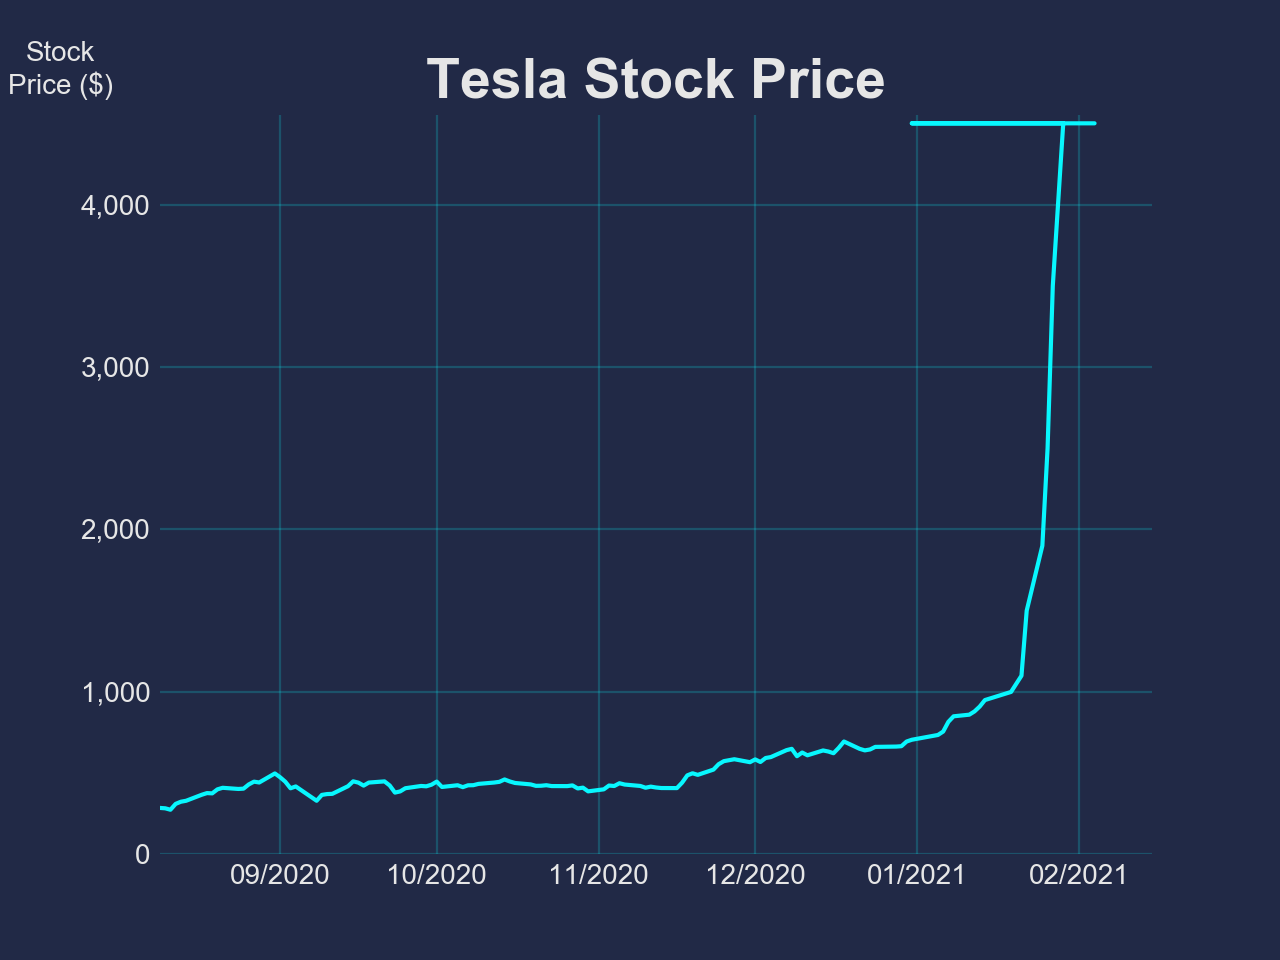

In [41]:
## Animate above plot!
N = df.shape[0]
fig, ax = plt.subplots()

plt.style.use("seaborn-dark")
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey

   
ax = plt.axes(xlim=(df['Date'].min(), df['Date'][:10].max()), ylim=(0, 5500))
    
line, = ax.plot([],[], color = colors[0])
point, = ax.plot(df['Date'][0], df['Adj Close'][0], marker = tesla_logo, markersize = 20, markerfacecolor='red', markeredgecolor = 'red', color = colors[1])
wsb_point, = ax.plot(df['Date'][0], df['wsb'][0], marker = wsb, markersize = 100, markerfacecolor='red', markeredgecolor = 'black')

def init():
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(0.0, df['Adj Close'].max())
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(DateFormatter('%m/%Y'))  
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) 
    wsb_point.set_data(datetime.datetime.strptime('2020-12-01', "%Y-%m-%d"), df.wsb)
    return line,
    
def update(num):
    ax.set_ylim(0, (df['Adj Close'][:(num + 1)].max() + 50))
#     ax.set_xlim(df['Date'].min(), df['Date'][:(num + 2)].max() + datetime.timedelta(days=10))
    ax.set_xlim(max(df['Date'][(num)] - datetime.timedelta(days=180), df.Date.min()), 
                df['Date'][:(num + 2)].max() + datetime.timedelta(days=10))   ## How about rolling 6 month?  
    line.set_data(list(df['Date'][:num]), df['Adj Close'][:num] )
    point.set_data(df['Date'][num], df['Adj Close'][num])
    if df.Date[:num].max() >= datetime.datetime.strptime('2020-12-01', "%Y-%m-%d"):
        wsb_point.set_data(datetime.datetime.strptime('2020-12-01', "%Y-%m-%d"), df['wsb'][num]) 
    else:
        wsb_point.set_data(df['Date'][num], df['wsb'][num]) 
    return line,

anim = ani.FuncAnimation(fig, update, frames = df.shape[0],  interval=100, blit=True, init_func = init, repeat = False)

plt.title('Tesla Stock Price', fontsize=20, fontweight="bold")
plt.ylabel('Stock\nPrice ($)', fontsize=10, rotation='horizontal')
ax.yaxis.set_label_coords(-0.1,1.02)

# ax.grid(color='#2A3459')
ax.grid(color = colors[0], alpha = 0.2)
   
# anim.save('tesla_animnated_stock_price.mp4', fps=10, extra_args=['-vcodec', 'libx264'], bitrate = 500, dpi = 200, writer = 'ffmpeg')

# plt.show()